In [1]:
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

import leader_implementation as lead

In [2]:
def create_gaussian_dataset(samples = 2000, dimensions=5, clusters=3):
        np.random.seed(42)  # For reproducibility

        # Parameters for the Gaussian distributions
        num_dimensions = dimensions
        num_samples = samples
        num_clusters = clusters
        samples_per_cluster = num_samples // num_clusters

        # Means for the Gaussian distributions (randomly chosen)
        means = [np.random.rand(num_dimensions) * 10 for _ in range(num_clusters)]

        # Covariance matrices for the Gaussian distributions (randomly chosen, positive definite)
        covariances = [np.diag(np.random.rand(num_dimensions) + 0.1) for _ in range(num_clusters)]

        # Generate samples for each cluster
        X = []
        y = []
        for cluster_id in range(num_clusters):
            cluster_data = np.random.multivariate_normal(means[cluster_id], covariances[cluster_id], samples_per_cluster)
            X.append(cluster_data)
            y.append(np.full(samples_per_cluster, cluster_id))

        # Concatenate the data and labels
        X = np.vstack(X)
        y = np.concatenate(y)
        
        column_names = [f'Feature_{i}' for i in range(X.shape[1])]  # Create column names for features
        X = pd.DataFrame(X, columns=column_names)

        return X, y


X, y = create_gaussian_dataset(20000, 8, 5)
varinfo_dict = {i: {'name': X.columns[i], 'type': 'Continuous'} for i in range(len(X.columns))}  
varinfo = pd.DataFrame(varinfo_dict).transpose()


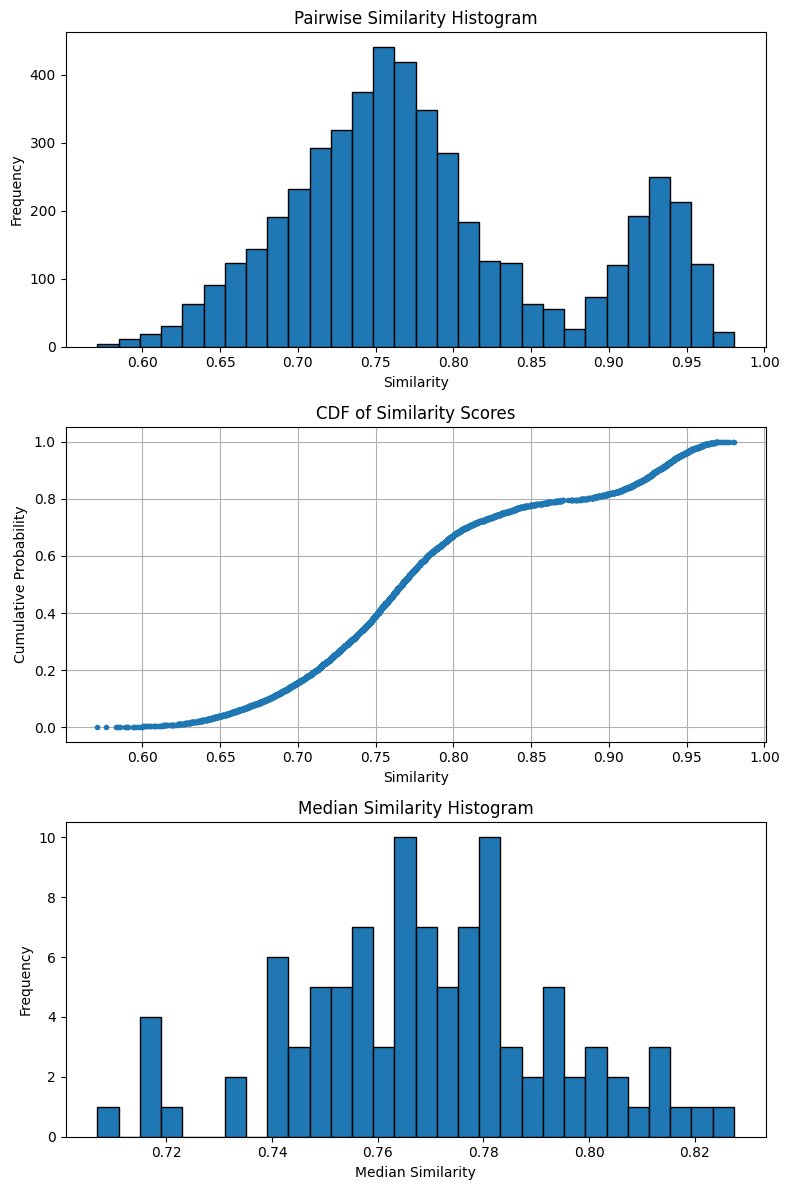

Mean similarity: 0.7841623735649954
Quartiles: [0.72293347 0.76700481 0.83179494]


In [3]:
leader = lead.LeaderAlgorithms(X, varinfo, similarity_func='gower', seed=42)

In [4]:
s_min = 0.75

In [5]:
k, lead, clust = leader.Leader(s_min)

                 Leader                 

=========SUMMARY OF STATISTICS==========

Algorithm executed in 1.9194579124450684 seconds

5 clusters have been found:

 Cluster 1     Leader: 0
               Size: 6592
               Average similarity: 0.8679
----------------------------------------
 Cluster 2     Leader: 4000
               Size: 6900
               Average similarity: 0.8475
----------------------------------------
 Cluster 3     Leader: 8000
               Size: 4734
               Average similarity: 0.9058
----------------------------------------
 Cluster 4     Leader: 12649
               Size: 743
               Average similarity: 0.7659
----------------------------------------
 Cluster 5     Leader: 16000
               Size: 1031
               Average similarity: 0.9481
----------------------------------------


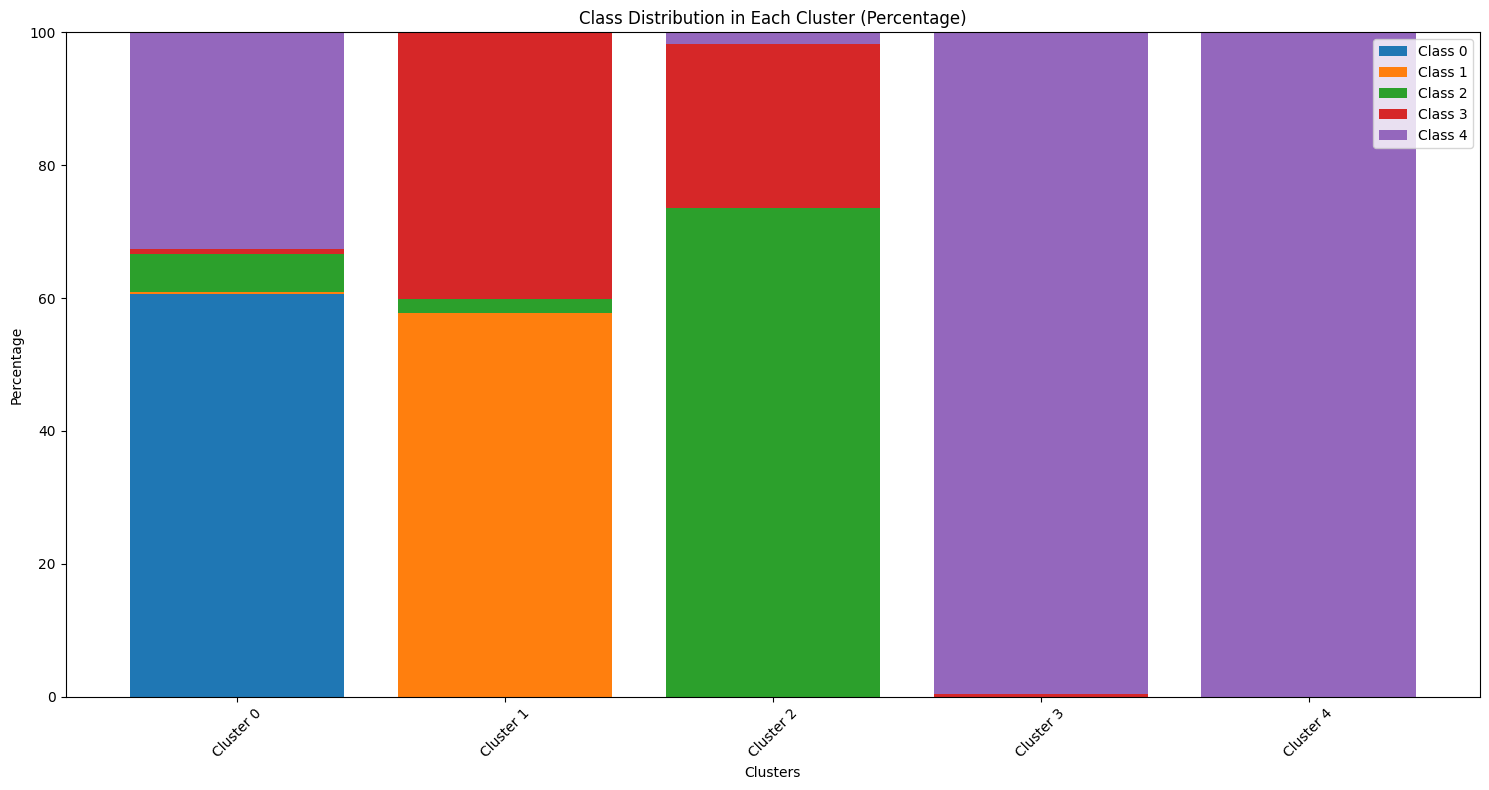

In [6]:
leader.cluster_classes_comparison(y)

                Leader2                 

=========SUMMARY OF STATISTICS==========

Algorithm executed in 1.7691092491149902 seconds

5 clusters have been found:

 Cluster 1     Leader: 0
               Size: 4000
               Average similarity: 0.9344
----------------------------------------
 Cluster 2     Leader: 4000
               Size: 4002
               Average similarity: 0.9002
----------------------------------------
 Cluster 3     Leader: 8000
               Size: 4265
               Average similarity: 0.9210
----------------------------------------
 Cluster 4     Leader: 12649
               Size: 3733
               Average similarity: 0.8933
----------------------------------------
 Cluster 5     Leader: 16000
               Size: 4000
               Average similarity: 0.9436
----------------------------------------


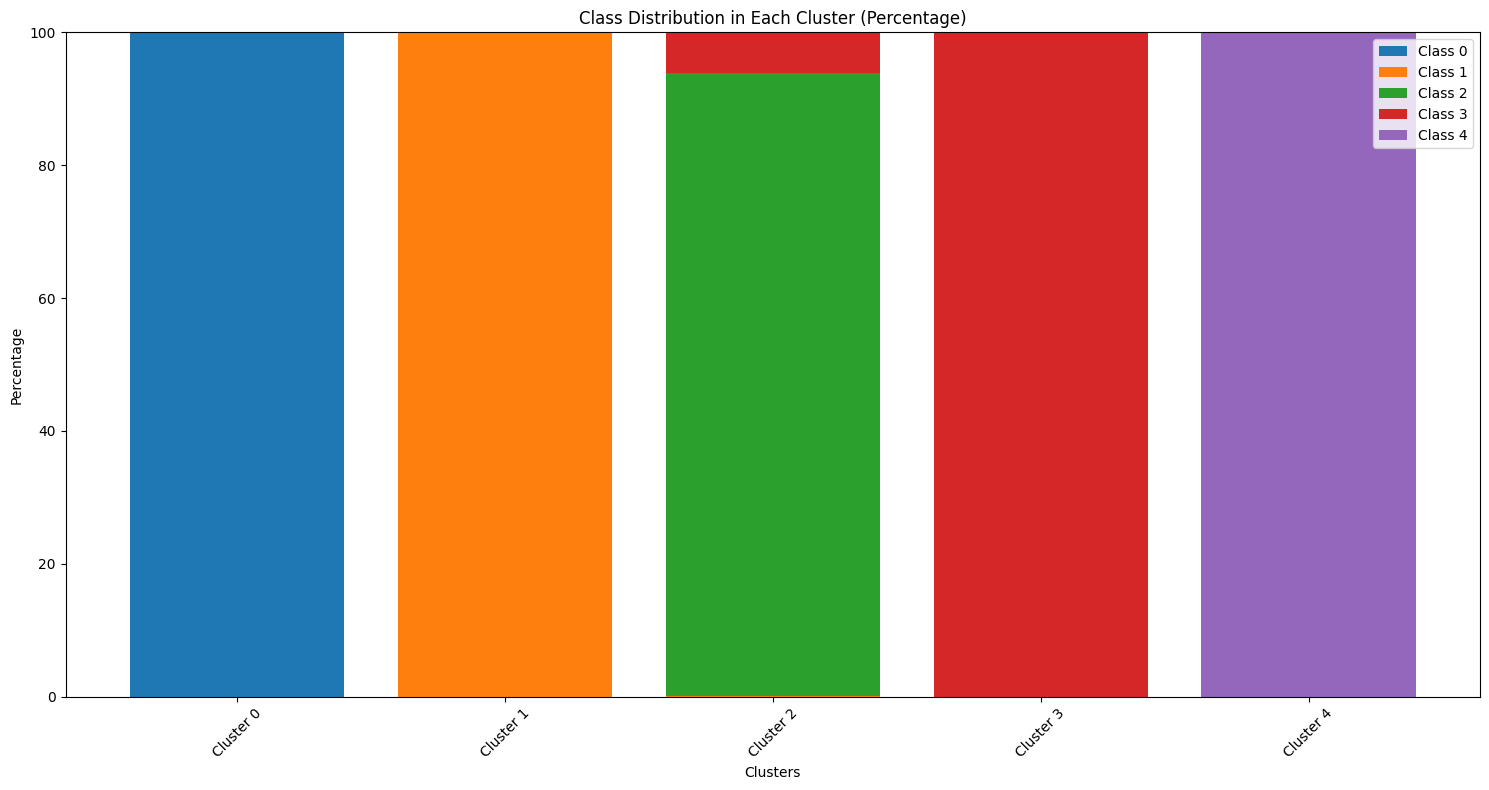

In [7]:
k, lead, clust = leader.Leader2(s_min)
leader.cluster_classes_comparison(y)

             Leader Medoid              

=========SUMMARY OF STATISTICS==========

Algorithm executed in 11.147708177566528 seconds

4 clusters have been found:

 Cluster 1     Leader: 2367
               Size: 4002
               Average similarity: 0.9486
----------------------------------------
 Cluster 2     Leader: 4674
               Size: 4208
               Average similarity: 0.9295
----------------------------------------
 Cluster 3     Leader: 11660
               Size: 7790
               Average similarity: 0.9070
----------------------------------------
 Cluster 4     Leader: 19991
               Size: 4000
               Average similarity: 0.9495
----------------------------------------


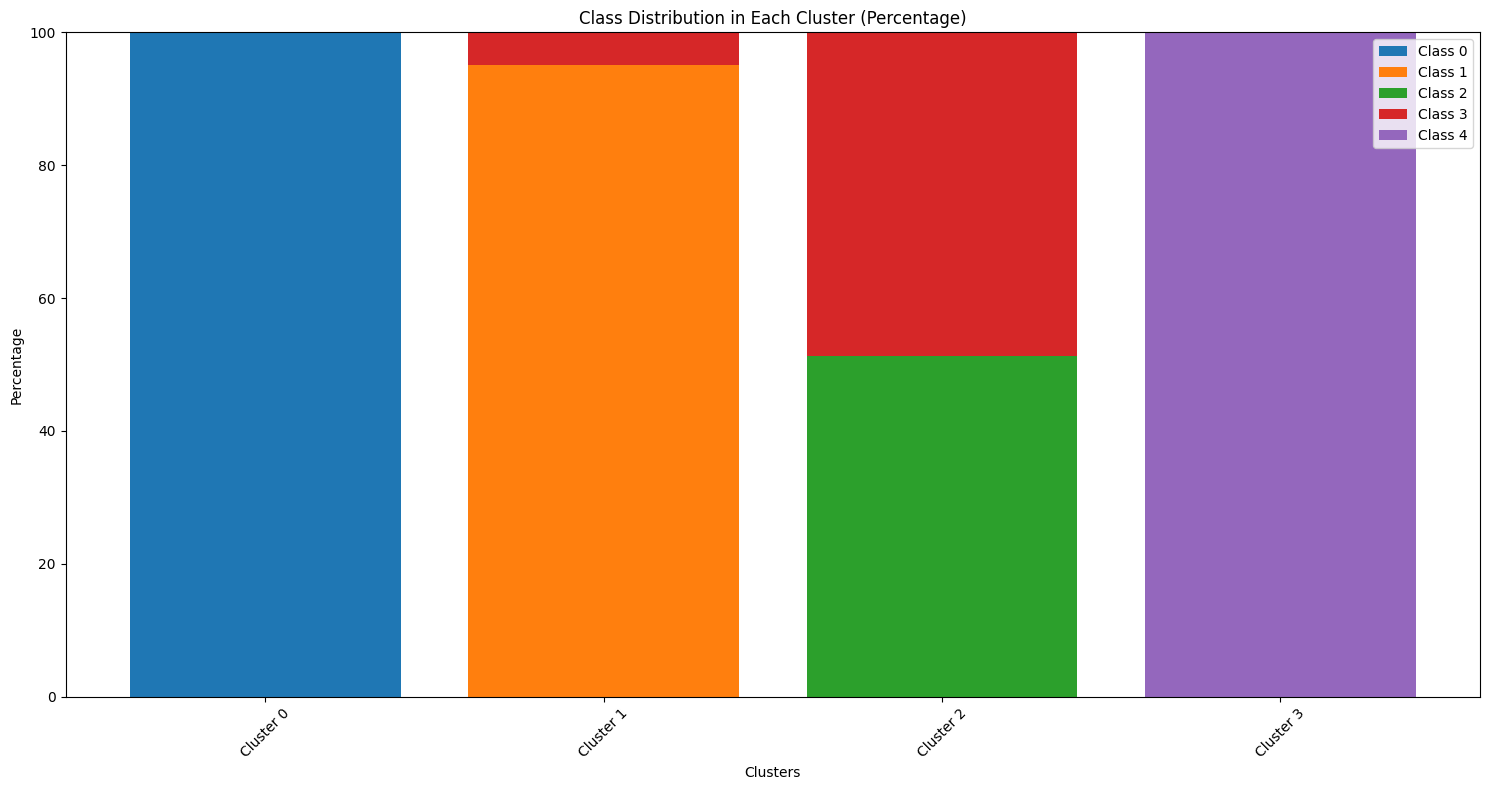

In [8]:
k, lead, clust = leader.Leader_Medoid(s_min)
leader.cluster_classes_comparison(y)

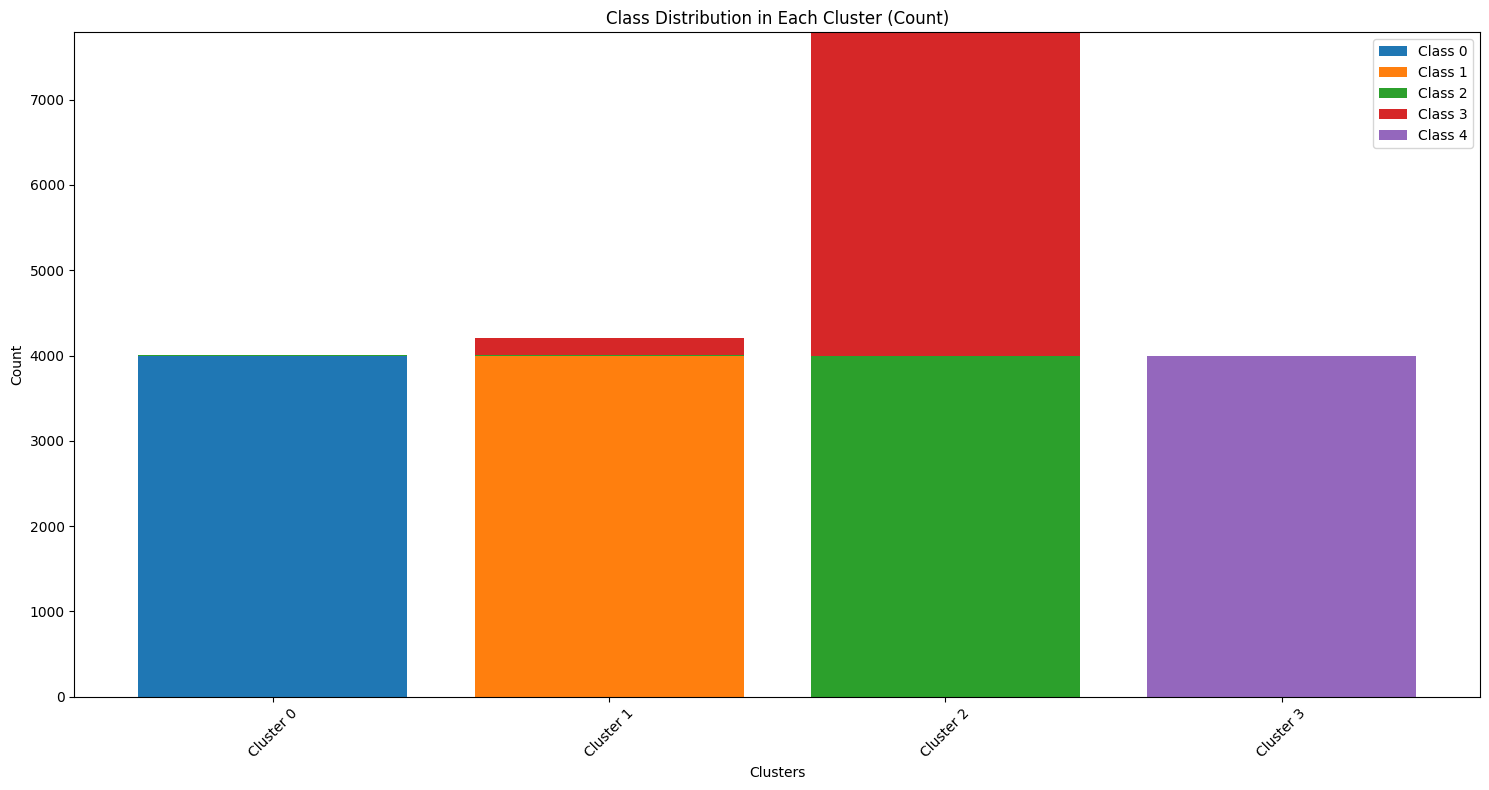

In [10]:
leader.cluster_classes_comparison(y, percentage=False)

# PCA

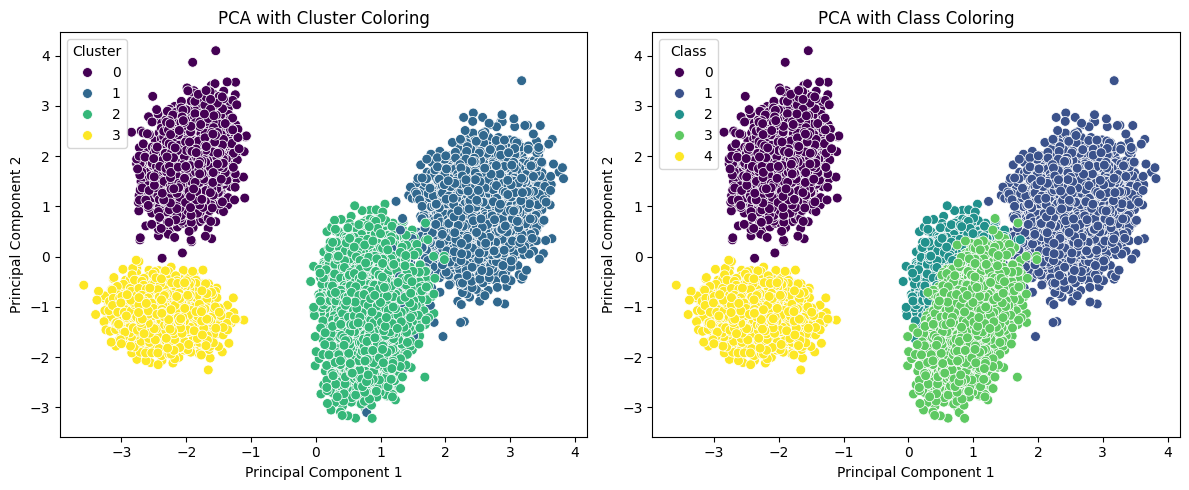

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(X_std)

# Create DataFrames for PCA results
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clust
df_pca['Class'] = y

# Plot 1: PCA with cluster coloring
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=50)
plt.title('PCA with Cluster Coloring')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')

# Plot 2: PCA with class coloring
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='viridis', s=50)
plt.title('PCA with Class Coloring')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')

plt.tight_layout()
plt.show()